In [33]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
plt.rc('legend',fontsize=15)
from scipy.stats import zscore
plt.rcParams['svg.fonttype'] = 'none'
from spiketimes.plots import add_event_vlines

In [34]:
data_dir = Path(".").absolute().parent / "data"
fig_dir = Path(".").absolute().parent / "figs"
dfs = pd.read_csv(data_dir / "cross_corr_simp.csv")
dfcc = pd.read_csv(data_dir / "cross_corr.csv")

In [35]:
dfs = (
    dfcc
    .assign(
        zcc = lambda x: x.groupby(["spiketrain_1", "spiketrain_2"])["crosscorrelation"].transform(zscore)
    )
    .groupby(["spiketrain_1", "spiketrain_2"])["zcc"].apply(lambda x: np.sum(np.abs(x) >= 2) > 3)
    .reset_index()
    .rename(columns={"zcc": "ztest"})
    .merge(dfs)
)

## Large Time Scale

In [36]:
(
    dfs
    .loc[lambda x: (x.lowest_p < 0.01) & (np.abs(x.time_bin) >= 0.4)]
    .loc[lambda x: x.comb == "sr_sr"]
    .head()
)

,spiketrain_1,spiketrain_2,ztest,binsize,time_bin,lowest_p,spiketrain_1_cluster,spiketrain_2_cluster,has_sr,has_sir,has_ff,comb
373,35,37,True,0.01,1.16,0.007075,slow_regular,slow_regular,True,False,False,sr_sr
1629,106,120,False,0.01,1.82,0.002921,slow_regular,slow_regular,True,False,False,sr_sr
1639,106,125,True,0.01,1.84,0.003942,slow_regular,slow_regular,True,False,False,sr_sr
2121,132,139,False,0.01,0.80,0.002532,slow_regular,slow_regular,True,False,False,sr_sr
2173,132,180,False,0.01,-1.32,0.004842,slow_regular,slow_regular,True,False,False,sr_sr


In [37]:
binsize = 0.01
# c1 = 2620
# c2 = 2629

c1 = 1844
c2 = 1904

# c1 = 2564
# c2= 2590

# c1 = 1668
# c2 = 1687

In [38]:
dfp = (
    dfcc
    .loc[lambda x: 
         (x.spiketrain_1 == c1) & 
         (x.spiketrain_2 == c2) &
         (x.binsize == binsize)]
)
x = dfp.time_bin.values
y = dfp.crosscorrelation.values

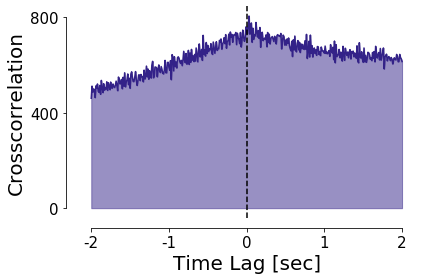

In [39]:

_, ax = plt.subplots()

sns.lineplot(data=dfp, x="time_bin", y="crosscorrelation", ax=ax, color="#332288")
ax.fill_between(x, y, alpha=0.5, color="#332288")

add_event_vlines(ax=ax, events=[0])

ax.set_ylabel("Crosscorrelation", fontsize=20)
# ax.set_yticks([0, 100, 200])


ax.set_xlabel("Time Lag [sec]", fontsize=20)
ax.set_xticks([-2, -1, 0, 1, 2])

sns.despine(offset=10, trim=True)
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticks([0, 400, 800])
ax.set_yticklabels(ax.get_yticks(), fontsize=15)

sns.despine()

plt.tight_layout()
plt.savefig(str(fig_dir / "SR_SR_cc_big_example2.svg"), dpi=300, transparent=True)

#### FF

In [17]:
(
    dfs
    .loc[lambda x: (x.lowest_p < 0.01) & (np.abs(x.time_bin) >= 0.4)]
    .loc[lambda x: x.comb == "sr_ff"]
    .head()
)

,spiketrain_1,spiketrain_2,ztest,binsize,time_bin,lowest_p,spiketrain_1_cluster,spiketrain_2_cluster,has_sr,has_sir,has_ff,comb
1019,84,90,False,0.01,-1.45,1.121615e-12,slow_regular,fast_firing,True,False,True,sr_ff
1025,84,93,False,0.01,-1.51,0.000000e+00,slow_regular,fast_firing,True,False,True,sr_ff
1027,84,94,True,0.01,-1.55,0.000000e+00,slow_regular,fast_firing,True,False,True,sr_ff
1029,84,95,False,0.01,1.78,5.605429e-03,slow_regular,fast_firing,True,False,True,sr_ff
1033,85,88,True,0.01,-0.71,0.000000e+00,slow_regular,fast_firing,True,False,True,sr_ff


In [18]:
binsize = 0.01

c1 = 84
c2 = 93

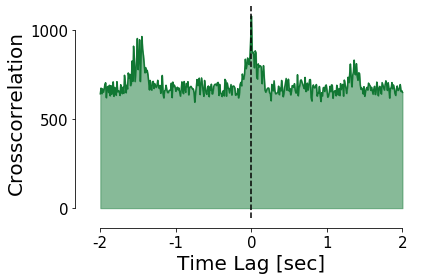

In [19]:
dfp = (
    dfcc
    .loc[lambda x: 
         (x.spiketrain_1 == c1) & 
         (x.spiketrain_2 == c2) &
         (x.binsize == binsize)]
)
x = dfp.time_bin.values
y = dfp.crosscorrelation.values

#

_, ax = plt.subplots()

sns.lineplot(data=dfp, x="time_bin", y="crosscorrelation", ax=ax, color="#117733")
ax.fill_between(x, y, alpha=0.5, color="#117733")

add_event_vlines(ax=ax, events=[0])

ax.set_ylabel("Crosscorrelation", fontsize=20)
# ax.set_yticks([0, 100, 200])


ax.set_xlabel("Time Lag [sec]", fontsize=20)
ax.set_xticks([-2, -1, 0, 1, 2])

sns.despine(offset=10, trim=True)
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticks([0, 500, 1000])
ax.set_yticklabels([0, 500, 1000], fontsize=15)
sns.despine()

plt.tight_layout()
plt.savefig(str(fig_dir / "SRFF_cc_big_example.svg"), dpi=300, transparent=True)

## Small Time Scale

In [20]:
binsize = 0.001

In [21]:
(
    dfs
    .loc[lambda x: (x.lowest_p < 0.01) & (x.binsize == 0.001) & (x.time_bin < 0.1)]
    .loc[lambda x: x.comb == "sr_sr"]
    .sample(5)
)

,spiketrain_1,spiketrain_2,ztest,binsize,time_bin,lowest_p,spiketrain_1_cluster,spiketrain_2_cluster,has_sr,has_sir,has_ff,comb
15080,2594,2619,True,0.001,-0.043,3.246375e-06,slow_regular,slow_regular,True,False,False,sr_sr
13944,2527,2558,True,0.001,0.018,5.611743e-05,slow_regular,slow_regular,True,False,False,sr_sr
13930,2527,2531,False,0.001,0.018,2.168532e-05,slow_regular,slow_regular,True,False,False,sr_sr
1876,114,117,False,0.001,0.001,2.186326e-13,slow_regular,slow_regular,True,False,False,sr_sr
13870,2526,2533,False,0.001,0.001,1.859026e-10,slow_regular,slow_regular,True,False,False,sr_sr


In [22]:
binsize = 0.001
# c1 = 84
# c2 = 85

c1 = 2524
c2 = 2526

# c1 = 2618
# c2 = 2622


# c1 = 2527
# c2 = 2563


dfp = (
    dfcc
    .loc[lambda x: 
         (x.spiketrain_1 == c1) & 
         (x.spiketrain_2 == c2) &
         (x.binsize == binsize)]
)
x = dfp.time_bin.values
y = dfp.crosscorrelation.values

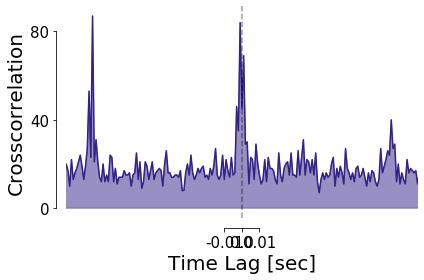

In [23]:
_, ax = plt.subplots()

sns.lineplot(data=dfp, x="time_bin", y="crosscorrelation", ax=ax, color="#332288")
ax.fill_between(x, y, alpha=0.5, color="#332288")

add_event_vlines(ax=ax, events=[0], vline_kwargs={"alpha":0.4})

ax.set_ylabel("Crosscorrelation", fontsize=20)
ax.set_yticks([0, 40, 80])


ax.set_xlabel("Time Lag [sec]", fontsize=20)
ax.set_xticks([-0.01, 0, 0.01])
ax.set_xlim([-0.1, 0.1])

sns.despine(offset=10, trim=True)
ax.set_xticklabels(np.round(ax.get_xticks(), 2), fontsize=15)
ax.set_yticklabels(np.round(ax.get_yticks(), 1), fontsize=15)
sns.despine()


plt.tight_layout()
plt.savefig(str(fig_dir / "SRSR_cc_small_example.svg"), dpi=300, transparent=True)

#### FF

In [24]:
(
    dfs
    .loc[lambda x: (x.lowest_p < 0.01) & (x.binsize == 0.001) & (np.abs(x.time_bin) < 0.1)]
    .loc[lambda x: x.comb == "sr_ff"]
    .sample(5)
)

,spiketrain_1,spiketrain_2,ztest,binsize,time_bin,lowest_p,spiketrain_1_cluster,spiketrain_2_cluster,has_sr,has_sir,has_ff,comb
2002,120,121,True,0.001,-0.018,0.000000,slow_regular,fast_firing,True,False,True,sr_ff
12510,2339,2347,False,0.001,-0.003,0.007525,slow_regular,fast_firing,True,False,True,sr_ff
15676,2611,2618,False,0.001,-0.086,0.009493,fast_firing,slow_regular,True,False,True,sr_ff
1874,114,116,False,0.001,0.001,0.000111,slow_regular,fast_firing,True,False,True,sr_ff
10014,1878,1910,False,0.001,0.001,0.000000,fast_firing,slow_regular,True,False,True,sr_ff


In [25]:
binsize = 0.001
c1 = 101
c2 = 117

# c1 = 153
# c2 = 95

dfp = (
    dfcc
    .loc[lambda x: 
         (x.spiketrain_1 == c1) & 
         (x.spiketrain_2 == c2) &
         (x.binsize == binsize)]
)
x = dfp.time_bin.values
y = dfp.crosscorrelation.values

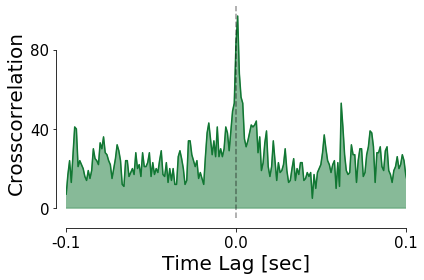

In [26]:
_, ax = plt.subplots()

sns.lineplot(data=dfp, x="time_bin", y="crosscorrelation", ax=ax, color="#117733")
ax.fill_between(x, y, alpha=0.5, color="#117733")

add_event_vlines(ax=ax, events=[0], vline_kwargs={"alpha":0.4})

ax.set_ylabel("Crosscorrelation", fontsize=20)
ax.set_yticks([0, 40, 80])


ax.set_xlabel("Time Lag [sec]", fontsize=20)
ax.set_xticks([-0.1, 0, 0.1])
ax.set_xlim([-0.1, 0.1])

sns.despine(offset=10, trim=True)
ax.set_xticklabels(np.round(ax.get_xticks(), 2), fontsize=15)
ax.set_yticklabels(np.round(ax.get_yticks(), 1), fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig(str(fig_dir / "SRFR_cc_small_example.svg"), dpi=300, transparent=True)